In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as np

In [18]:
data = pd.read_csv('formulatedTest.csv')

In [30]:
data.head(7)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.000000,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.000000,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
5,60,RL,75.000000,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,84,0,0,0,0,0,4,2010,WD,Normal
6,20,RL,68.580357,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,21,0,0,0,0,500,3,2010,WD,Normal


In [20]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [31]:
def ImputeNa(data, variable):
    randomSample = data[variable].dropna().sample(data[variable].isnull().sum(), random_state = 0)
    randomSample.index = data[data[variable].isnull()].index
    data[data[variable].isnull()][variable] = randomSample
    return data

In [32]:
print(data[data['MSSubClass']==20]['SaleType'])

0        WD
1        WD
6        WD
8        WD
9        WD
       ... 
1443    New
1444     WD
1447     WD
1451     WD
1456     WD
Name: SaleType, Length: 543, dtype: object


In [33]:
data.shape

(1459, 75)

In [34]:
data = ImputeNa(data, 'MSSubClass')

In [39]:
def plotHistAndQQPlot(data, variable):
    plt.figure(figsize=[15,6])
    plt.subplot(1,2,1)
    data[variable].hist()
    
    plt.subplot(1,2,2)
    stat.probplot(data[variable], plot=plt)
    plt.show()

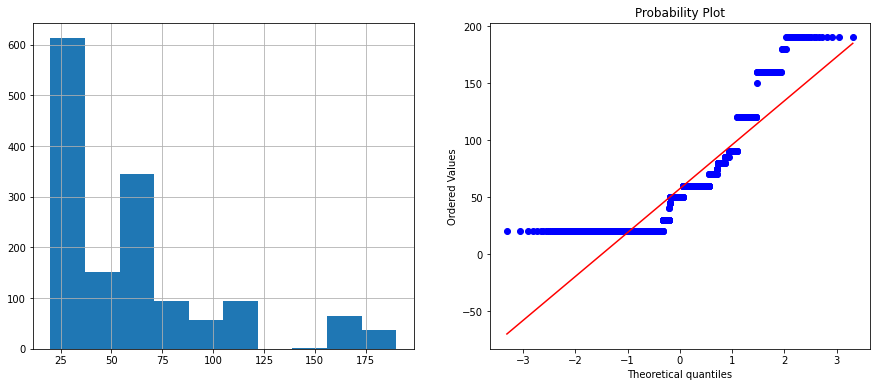

In [40]:
plotHistAndQQPlot(data,'MSSubClass')

In [42]:
data['MSSubClass'] = np.log(data['MSSubClass']+1)

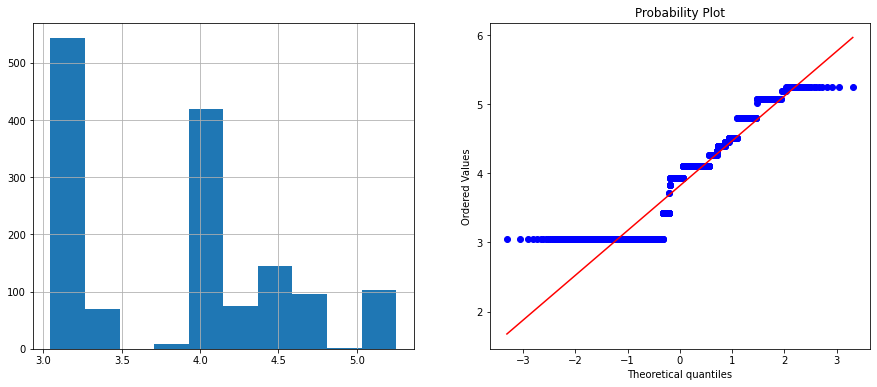

In [43]:
plotHistAndQQPlot(data, 'MSSubClass')

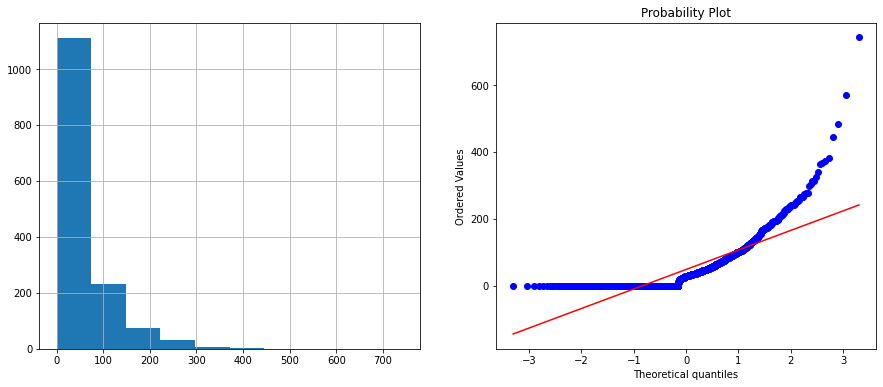

In [44]:
plotHistAndQQPlot(data, 'OpenPorchSF')

In [45]:
data['OpenPorchSF'] = data['OpenPorchSF']**(1/5)

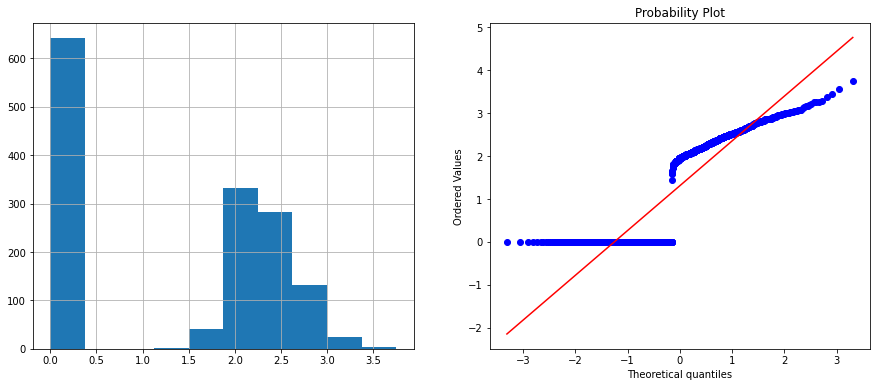

In [46]:
plotHistAndQQPlot(data, 'OpenPorchSF')